In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
dt = load_iris()
data=pd.DataFrame(dt.data,columns=dt.feature_names)
data['target']=dt.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [26]:
data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


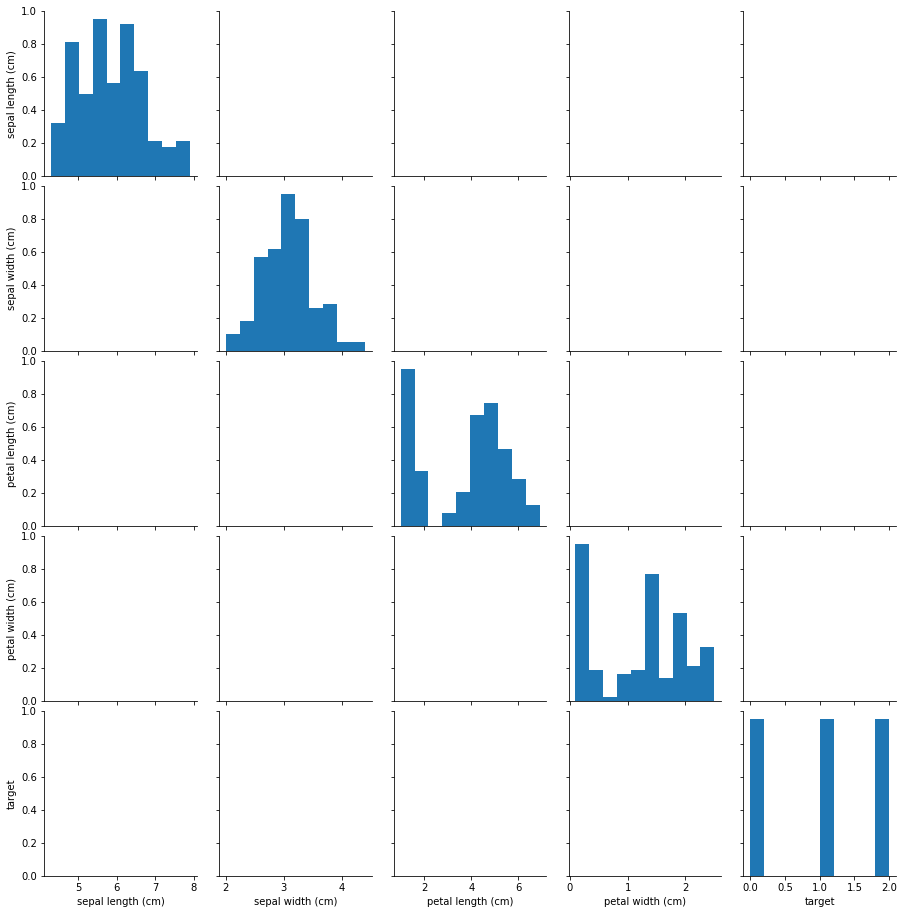

In [78]:
sns.pairplot(data,kind="bar")

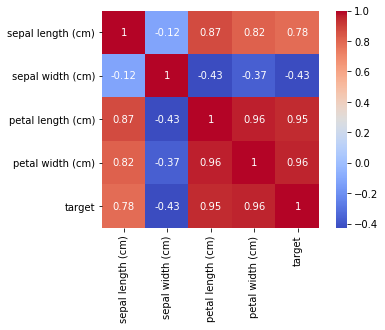

In [31]:
sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm')

In [34]:
fname=dt.feature_names

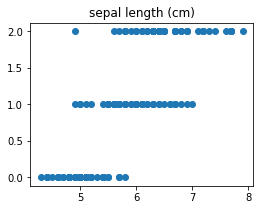

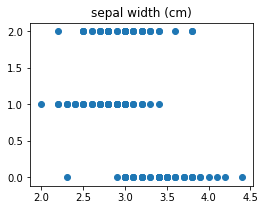

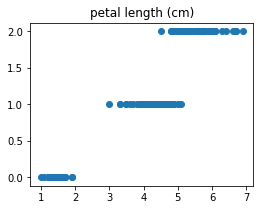

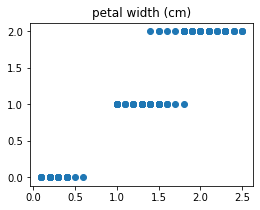

In [46]:
for i in fname:
    fig = plt.figure(i, figsize=(4, 3))
    plt.scatter(data[i],data.target)
    plt.title(i)

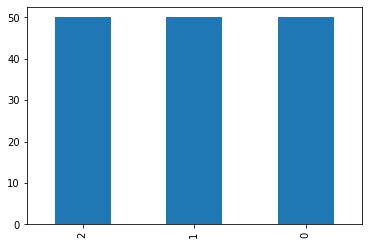

In [41]:
data['target'].value_counts().plot(kind='bar')

In [58]:
X=data.drop(["target"],axis=1,)
y=data.target

In [61]:
X_reduced = PCA(n_components=3).fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42,shuffle=True)
sgd=SGDClassifier()
svc=SVC()

In [76]:
sgd.fit(X_train,y_train)
prediction = sgd.predict(X_test)
scores = cross_val_score(sgd, X_reduced, y, cv=5)
print("Cross Validation",scores)
print("Accuracy Score",accuracy_score(prediction, y_test))
print(prediction[0:10])
print(y_test[0:10])

Cross Validation [1.         0.96666667 0.93333333 0.96666667 1.        ]
Accuracy Score 1.0
[1 0 2 1 1 0 1 2 1 1]
73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
Name: target, dtype: int32


In [77]:
svc.fit(X_train,y_train)
pred= svc.predict(X_test)
score = cross_val_score(svc,X_reduced, y, cv=5)
print(r"Cross Validation",score)
print(r"Accuracy Score",accuracy_score(pred, y_test))
print(pred[0:10])
print(y_test[0:10])

Cross Validation [0.96666667 1.         0.93333333 0.96666667 1.        ]
Accuracy Score 1.0
[1 0 2 1 1 0 1 2 1 1]
73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
Name: target, dtype: int32
